# Task: Implenting a basic CNN using mnist dataset

 ## Steps to follow

    1. Load  the dataset and become one with the data (understand the dataset)
    2. Preprocess the data (prepare it for modelling)
    3. Create a baseline model
    4. fit the model
    5. Evaluate the model
    

## 1. Load the data and become one with it

In [1]:
# Importing Utilities

import tensorflow as tf
from keras.datasets import mnist

import matplotlib.pyplot as plt

2024-05-31 07:00:04.810288: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 07:00:04.810390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 07:00:04.978687: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
#  Mnist has already split the dataset for us into training and testing set 

(X_train,y_train), (X_test,y_test) = mnist.load_data()


In [8]:
# Check the training shape 
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

The X_train has 60000 images with a pixel value of 28 X 28, while the y_train has 60000 images.

In [9]:
# Checkng the lenght of the training labels

len(X_train), len(y_train)

(60000, 60000)

In [11]:
# checking the shape of the test_set

X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

# Let's make visualization to understand our data more

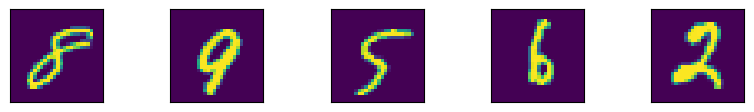

In [22]:
import numpy as np

plt.figure(figsize=(10,7))

for i in range(5):
    rndm = np.random.randint(len(X_train))
    plt.subplot(5,5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[rndm])
    plt.grid(False)
    
plt.show()

We now have an idea of what dataset we are working on. It's always a good practice to visualize our data in other to understand it better

## Preprocessing our data

Machine learning models performed best if they are normalized ( change them to be btw 0 and 1)
Let's do that

In [24]:
# Checking to see how our arrays are

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

You can see they are between 0 to 255, lets rescale them.

To do that we will divide by the higgest number which is 255

In [25]:
X_train, X_test = X_train/255.0, X_test/255.0

In [26]:
# lets check them

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## We are good to go let's create our model

In [69]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model

model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])


# fit the model 

history_1 = model_1.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1109 - loss: -914777112576.0000 - val_accuracy: 0.1135 - val_loss: -28848418717696.0000
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1128 - loss: -91953739857920.0000 - val_accuracy: 0.1135 - val_loss: -519197423566848.0000
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1115 - loss: -863628064456704.0000 - val_accuracy: 0.1135 - val_loss: -2522495496224768.0000
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1141 - loss: -3456526060617728.0000 - val_accuracy: 0.1135 - val_loss: -7570845689970688.0000
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1132 - loss: -9544305316200448.0000 - val_accuracy: 0.1135 - val_loss: -17699252062912512.0000


woww.....Our model is worst,
let's plot a loss curve to see whats happening

## Evaluate the model

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1160 - loss: -17138064119824384.0000
0.11349999904632568


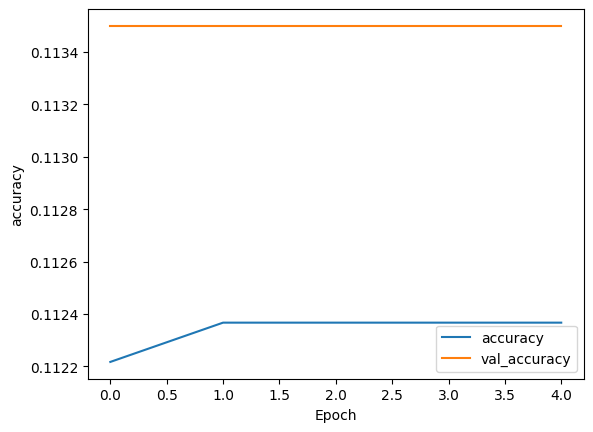

In [70]:
plt.plot(history_1.history["accuracy"], label="accuracy")
plt.plot(history_1.history['val_accuracy'],label="val_accuracy" )
plt.xlabel('Epoch')
plt.ylabel("accuracy")
plt.legend();

test_loss,test_acc = model_1.evaluate(X_test,y_test)
print(test_acc)

HAHA our model perfomered very worse, we need to fix it